# Assignment: Working with Data

>Using the data below, answer the following questions:

>1) Which entities (top 5) had the largest population density in 2020?
>2) Which entities have more water area than land area?
>3) Which entities increased in population the most in the last 10 years?
>4) What state bird accounts for the largest population as of 2020? Land area?
>5) How many entities' largest city is their capital city?
>6) Which city has the largest percent drop from their largest city to their 5th largest? 100*(1st largest - 5th largest)/(1st largest)

In [2]:
import pandas as pd

In [3]:
facts = pd.read_csv('../data/state_facts.tsv',delimiter="\t")
facts.head(5)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_1,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,Birmingham,208928,Huntsville,204189.0,Montgomery,198525.0,Mobile,189572.0,Tuscaloosa,101113.0
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,Anchorage,291538,Juneau,32113.0,Fairbanks,31516.0,Wasilla,10529.0,Sitka,8647.0
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,Tafuna,7945,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Phoenix,1680992,Tucson,545975.0,Mesa,508958.0,Chandler,257165.0,Scottsdale,255310.0
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,Little Rock,197312,Fort Smith,87845.0,Fayetteville,86751.0,Springdale,81029.0,Jonesboro,76990.0


>Using the "state_dates.tsv" data, answer the remaining questions. You will need to merge the two data sets together:

>7) Of the states that joined the United States before 1790, what is the most common state flower?
>8) Which has the larger population density, the most dense US Territory or the least dense state?
>9) Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black
>10) Make two additional graphs like the one above but one for land area (green bars) and one for water area (blue bars)

Hint: `pd.read_csv('../data/state_dates.tsv',delimiter="\t")`

Hint: You likely want to convert the Date column to datetime. You might have to correct errors in the data as well.

Hint: `states['Date']<pd.datetime(1790,1,1)`

Hint: `pd.merge(****,****,left_on='USPS_code',right_on='Abbreviation',how='outer')`

In [4]:
# Sample code to help with the plots

#import matplotlib as plt
#%config InlineBackend.figure_format ='retina' #This makes your plot clearer


#plot = *your df by date*[[*column*,'Abbreviation']].plot(kind='bar',figsize=(10,4))
#plot.set_xticklabels(*your df by date*['Abbreviation']);

In [5]:
#Which entities (top 5) had the largest population density in 2020?(Fix)
df = facts["Pop_2020"]/facts["Area_land"]
df_top_5 = df.nlargest(5).sort_values(ascending = False).head(5)

fd = pd.DataFrame({"States": facts.loc[df_top_5.index, "State"], 
                   "Population Density": df_top_5})

print(fd)

                    States  Population Density
9    District of Columbia          4364.208861
32             New Jersey           487.688035
43           Rhode Island           409.775579
42            Puerto Rico           370.531574
23          Massachusetts           347.981239


In [6]:
#Which entities have more water area than land area?(Fix)
dw = facts["Area_water"]
dw

facts['WaterLarger'] = facts['Area_water'] > facts['Area_land']

water_states = facts[facts["WaterLarger"] == True]


water_states

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,WaterLarger
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,7945,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0,True
12,Guam,1478,543,935,168.4,159358,1*,Guam rail (ko'ko'),Bougainvillea spectabilis,Where America's Day Begins,...,44943,Yigo,20539.0,Tamuning,19685.0,Mangilao,15191.0,Barrigada,8875.0,True
37,Northern Mariana Islands,5117,472,4644,51.0,53883,1*,Mariana fruit-dove,Flores mayo,NaN,...,48220,Tinian2,3136.0,Rota2,2527.0,Northern Islands2,0.0,NaN,NaN,True
48,United States Virgin Islands,1898,348,1550,106235.0,106405,1*,California gull,Yellow Elder,United in Pride and Hope,...,18481,Sion Farm,13003.0,Northside,10049.0,East End,5128.0,Southcentral,3277.0,True


In [7]:
#Which entities increased in population the most in the last 10 years?
facts["populationDifference"]=facts["Pop_2020"] - facts["Pop_2010"]

facts["populationDifference"]

n = 5 

biggestPopulation = facts.sort_values('populationDifference', ascending =False).head(n)

biggestPopulation

facts["City_1"]


0           Birmingham 
1            Anchorage 
2               Tafuna 
3              Phoenix 
4          Little Rock 
5          Los Angeles 
6               Denver 
7           Bridgeport 
8           Wilmington 
9     Washington, D.C. 
10        Jacksonville 
11             Atlanta 
12              Dededo 
13           Honolulu1 
14               Boise 
15             Chicago 
16        Indianapolis 
17          Des Moines 
18             Wichita 
19          Louisville 
20         New Orleans 
21            Portland 
22           Baltimore 
23              Boston 
24             Detroit 
25         Minneapolis 
26             Jackson 
27         Kansas City 
28            Billings 
29               Omaha 
30           Las Vegas 
31          Manchester 
32              Newark 
33         Albuquerque 
34       New York City 
35           Charlotte 
36               Fargo 
37             Saipan2 
38            Columbus 
39       Oklahoma City 
40            Portland 
41        Philad

In [8]:
#What state bird accounts for the largest population as of 2020? Land area?

# popBird = facts.sort_values("Pop_2020" , ascending=False).head(1)

# popBird["State_bird"]



landBird = facts.groupby(by = "State_bird")["Pop_2020"].sum().idxmax()
print(landBird)

Northern mockingbird 


In [9]:
landBird = facts.sort_values("Area_land", ascending = False).head(1)
landBird["State_bird"]


1    Willow ptarmigan 
Name: State_bird, dtype: object

In [10]:
#How many entities’ largest city is their city 1?(If the population)

facts = facts.fillna(value =0 )

calculation = (facts["city_1_pop"] == facts["Capital_pop"]).sum()

print(calculation)


21


In [11]:
#Which city has the largest percent drop from their largest city to their 5th largest? 100*(1st largest - 5th largest)/(1st largest)
print("From the table the answer would be New York")
print("")
facts["calculation2"] = (100*(facts["city_1_pop"]- facts["city_5_pop"])/(facts["city_1_pop"]))

facts.sort_values(by="calculation2",ascending =False)






From the table the answer would be New York



,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,WaterLarger,populationDifference,calculation2
9,District of Columbia,177,158,19,689545.0,601723,1*,Wood thrush,American Beauty Rose,Justitia Omnibus,...,0.0,0,0.0,0,0.0,0,0.0,False,87822.0,100.000000
37,Northern Mariana Islands,5117,472,4644,51.0,53883,1*,Mariana fruit-dove,Flores mayo,0,...,3136.0,Rota2,2527.0,Northern Islands2,0.0,0,0.0,True,-53832.0,100.000000
34,New York,141297,122057,19240,20201249.0,19378102,26,Eastern bluebird,Rose,Excelsior!,...,251298.0,Rochester,206284.0,Yonkers,199663.0,Syracuse,142749.0,False,823147.0,98.392453
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,32113.0,Fairbanks,31516.0,Wasilla,10529.0,Sitka,8647.0,False,23160.0,97.034006
15,Illinois,149995,143793,6202,12812508.0,12830632,17,Northern cardinal,Violet,"State sovereignty, national union",...,198187.0,Naperville,148304.0,Joliet,148099.0,Rockford,146526.0,False,-18124.0,94.585132
41,Pennsylvania,119280,115883,3397,13002700.0,12702379,17,Ruffed Grouse,Mountain laurel,"Virtue, Liberty and Independence",...,301048.0,Allentown,126238.0,Erie,96471.0,Reading,88495.0,False,300321.0,94.426663
19,Kentucky,104656,102269,2387,4505836.0,4339367,6,Northern cardinal,Goldenrod,"United we stand, divided we fall; Deo gratiam ...",...,323780.0,Bowling Green,68401.0,Owensboro,59809.0,Covington,40366.0,False,166469.0,93.495419
29,Nebraska,200330,198974,1356,1961504.0,1826341,3,Western meadowlark,Goldenrod,Equality before the law,...,289102.0,Bellevue,53627.0,Grand Island,51478.0,Kearney,33761.0,False,135163.0,92.790147
33,New Mexico,314917,314161,757,2117522.0,2059179,3,Greater roadrunner,Yucca flower,Crescit eundo,...,102926.0,Rio Rancho,98023.0,Santa Fe,84683.0,Roswell,47635.0,False,58343.0,91.497060
13,Hawaii,28313,16635,11678,1455271.0,1360301,2,Hawaiian goose (Nēnē),Hawaiian hibiscus,Ua Mau ke Ea o ka ‘Āina i ka Pono,...,49914.0,Pearl City1,47698.0,Hilo1,43263.0,Kailua1,38635.0,False,94970.0,88.803526


In [12]:
dates = pd.read_csv('../data/state_dates.tsv',delimiter="\t")
import matplotlib.pyplot as plt

In [13]:
merged = pd.merge(facts,dates,left_on='USPS_code',right_on='Abbreviation',how='outer')
merged["Date"]= pd.to_datetime(merged['Date'])
merged

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_4_pop,City_5,city_5_pop,WaterLarger,populationDifference,calculation2,Name,Date,Status,Abbreviation
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,189572.0,Tuscaloosa,101113.0,False,244543.0,51.603902,Alabama,1819-12-14,State,AL
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,10529.0,Sitka,8647.0,False,23160.0,97.034006,Alaska,1959-01-03,State,AK
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,3195.0,Pava'ia'i,2450.0,True,-6082.0,69.162996,American Samoa,1900-04-17,Territory,AS
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,257165.0,Scottsdale,255310.0,False,759485.0,84.811944,Arizona,1912-02-14,State,AZ
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,81029.0,Jonesboro,76990.0,False,95606.0,60.980579,Arkansas,1836-06-15,State,AR
5,California,423967,403466,20501,39538223.0,37253956,52,California quail,California poppy,Eureka,...,884198.0,Fresno,530093.0,False,2284267.0,86.740992,California,1850-09-09,State,CA
6,Colorado,269601,268431,1170,5773714.0,5029196,8,Lark bunting,Rocky Mountain columbine,Nil sine numine,...,167830.0,Lakewood,156798.0,False,744518.0,78.438445,Colorado,1876-08-01,State,CO
7,Connecticut,14357,12542,1816,3605944.0,3574097,5,American robin,Mountain laurel,Qui transtulit sustinet,...,122105.0,Waterbury,108093.0,False,31847.0,25.401656,Connecticut,1788-01-09,State,CT
8,Delaware,6446,5047,1399,989948.0,897934,1,Delaware Blue Hen,Peach blossom,Liberty and independence,...,22582.0,Smyrna,11580.0,False,92014.0,83.605861,Delaware,1787-12-07,State,DE
9,District of Columbia,177,158,19,689545.0,601723,1*,Wood thrush,American Beauty Rose,Justitia Omnibus,...,0.0,0,0.0,False,87822.0,100.000000,District of Columbia,1871-02-21,Federal District,DC


The most common is Mountain Laurel


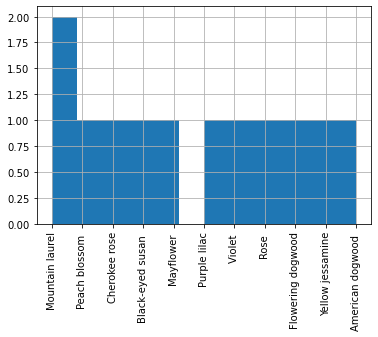

In [21]:
#Of the states that joined the United States before 1790, what is the most common state flower?



mask = merged['Date']<pd.to_datetime("1790-1-1")

merged[mask]["State_flower"].hist(xrot=90, bins = 12)

print("The most common is Mountain Laurel")

In [16]:
#Which has the larger population density, the most dense US Territory or the least dense state?(Fix)

mask2 = merged["Status"] == "Territory"

merged["Density"] = merged["Pop_2020"]/merged["Area_land"]
print(merged[mask2][["State", "Density"]].sort_values(by= "Density", ascending =False).head(1))

print("")

mask3 = merged["Status"] == "State"

print(merged[mask3][["State", "Density"]].sort_values(by = "Density", ascending = True).head(1))

print("")

print("The answer would be Puerto Rico")

            State     Density
42   Puerto Rico   370.531574

      State   Density
1   Alaska   0.496221

The answer would be Puerto Rico


<AxesSubplot:xlabel='State'>

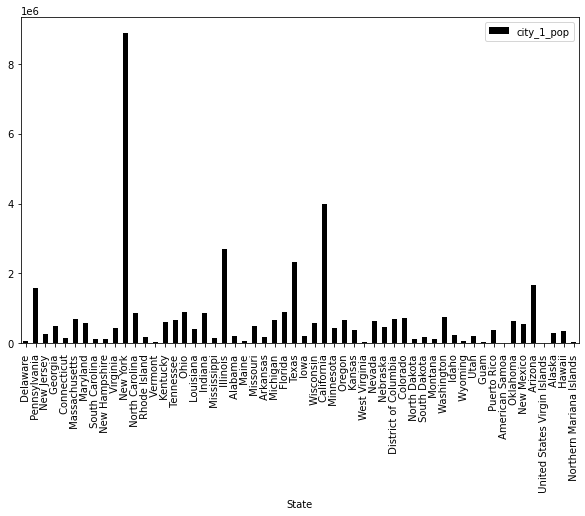

In [25]:
#Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black

merged.sort_values(by = "Date", ascending = True).plot(x='State', y='city_1_pop', kind='bar', color ='k', figsize=(10, 6))


<AxesSubplot:xlabel='State'>

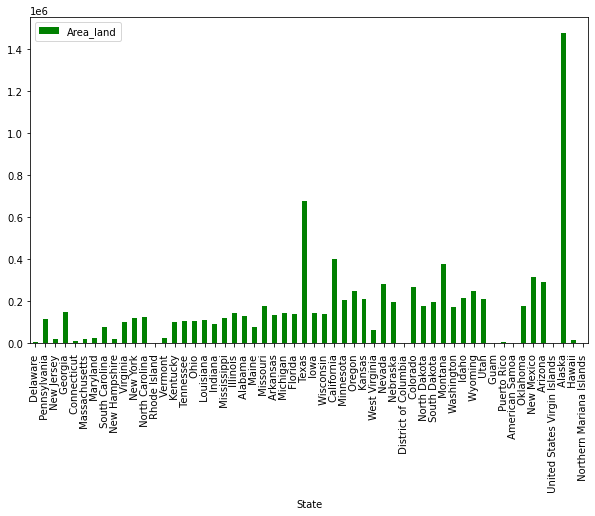

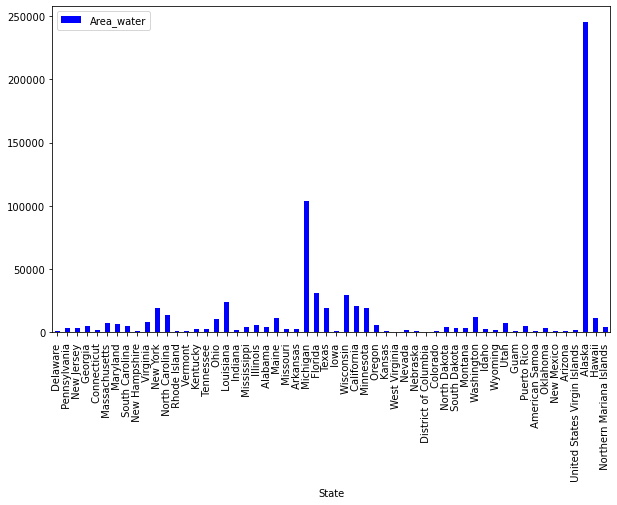

In [27]:
#Make two additional graphs like the one above but one for land area (green bars) and one for water area (blue bars)

merged.sort_values(by = "Date", ascending = True).plot(x='State', y='Area_land', kind='bar' , color='g', figsize=(10, 6))
merged.sort_values(by = "Date", ascending = True).plot(x='State', y='Area_water', kind='bar' , color='b', figsize=(10, 6))